# Part 1 Visualization

In [1]:
# packages to import
import sympy as sp
from sympy import Matrix, diff, init_printing
from scipy.optimize import fsolve, minimize
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
init_printing(use_unicode=True) # nice printing of sympy objects

## Original Surface Plot

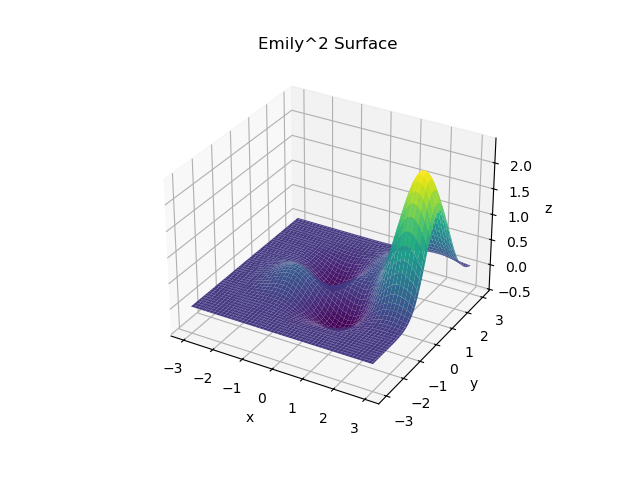

In [2]:
# constants, chosen randomly within the ranges
# s.t.
# a1, a4 E [0.8, 1.5]
# a2, a3, a5, a6 E [0.5, 1.2]
a1, a2, a3 = 1.5, 0.6, 0.7
a4, a5, a6 = 0.8, 1.2, 0.99

# linear spacing for domain of functions
xRange = np.linspace(-3, 3, 100)
yRange = np.linspace(-3, 3, 100)
# grid of points
X, Y = np.meshgrid(xRange,yRange)

# surface
Z = (a1*X*Y - a2*X**3 - a3*Y**2) *np.exp(-X**2 - Y**2) + (a4*X**2 - a5*X*Y + a6*Y**2)*np.exp(-(X-2)**2 -(Y-1)**2)

plt.close("all")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Emily^2 Surface")
plt.show()

## Contour Plot ##
### manual entry of critical points is required ###

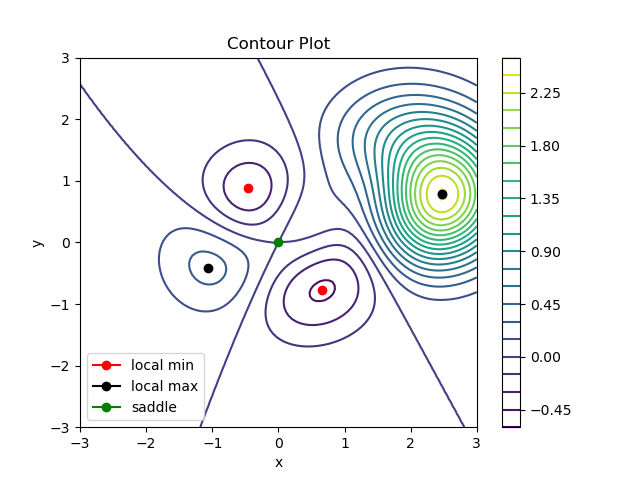

In [3]:
#Contour plot
plt.close('all')
plt.figure()
plt.contour(X,Y,Z,20,cmap='viridis')
# critical points, points calculated below manually
plt.plot(0.66612589, -0.7802442, marker='o', color='r', label="local min")
plt.plot(-0.45330624,  0.87671596, marker='o', color='r')
plt.plot(-1.05783068, -0.40857803, marker='o', color='k')
plt.plot(2.47926012, 0.77939789, marker='o', color='k', label="local max")
plt.plot(0,0, marker='o', color='g', label='saddle')

plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.title("Contour Plot")
plt.legend(loc='lower left')
plt.show()

# Part 2 Critical Points

### Critical Point Calculations using SciPy

source for documentation and example: https://docs.scipy.org/doc/scipy/tutorial/optimize.html 

### Local Minimum Calculations
Calculations require an initial guess as input

In [4]:
# objective function 
# the same surface as plotted above
def F(x) :
    return (a1*x[0]*x[1] - a2*x[0]**3 - a3*x[1]**2) *np.exp(-x[0]**2 - x[1]**2) + (a4*x[0]**2 - a5*x[0]*x[1] + a6*x[1]**2)*np.exp(-(x[0]-2)**2 -(x[1]-1)**2)

# initial guess
# past initial guesses for minimums include
# x0 = np.array([0, 0])
x0 = np.array([1,1])

result = minimize(F, x0, method="CG")

print("Optimization successful: ", result.success)
print("Minimum value of the function at the point:", result.fun)
print("Optimal parameters (x, y): ", result.x)
print("Number of iterations: ", result.nit)

Optimization successful:  True
Minimum value of the function at the point: -0.4037196260821781
Optimal parameters (x, y):  [-0.45330617  0.87671606]
Number of iterations:  7


### Local Maximum Calculations

calculations require an initial guess as input

In [5]:
# Maximum values found using the negative function values and scipy.optimize.minimize() 

def negF(x) :
    return -1* ((a1*x[0]*x[1] - a2*x[0]**3 - a3*x[1]**2) *np.exp(-x[0]**2 - x[1]**2) + (a4*x[0]**2 - a5*x[0]*x[1] + a6*x[1]**2)*np.exp(-(x[0]-2)**2 -(x[1]-1)**2))

# initial guess

# x1 = np.array([-1, -0.5]) # local max
# x1 = np.array([2.5, 0.8]) # local max
x1 = np.array([0.7,-0.7]) # saddle point

result2 = minimize(negF, x1, method="CG")

print("Optimization successful: ", result2.success)
print("Maximum value of the function:", -1*result2.fun)
print("Optimal parameters (x,y): ", result2.x)
print("Number of iterations: ", result2.nit)

Optimization successful:  True
Maximum value of the function: 2.4146918820216974
Optimal parameters (x,y):  [2.47926013 0.77939789]
Number of iterations:  9


## Critical Point Calculations using Sympy (Maximums, Minimums, and Classifications)
### Initial Guess *near* to Critical Point is required

source: https://www.sympy.org/en/index.html

calculus examples for sympy: https://certik.github.io/scipy-2013-tutorial/html/tutorial/calculus.html

lambdify documentation: https://docs.sympy.org/latest/modules/utilities/lambdify.html

"The primary purpose of this function is to provide a bridge from SymPy expressions to numerical libraries such as NumPy, SciPy, NumExpr, mpmath, and tensorflow."

In [6]:
initialGuess = [-0.45330624, 0.87671596] # run this first to update it

In [7]:
# initial code sample from google ai
# has been further developed by referencing relevant documentation

# specify the function variables
x, y, z, u, v = sp.symbols('x y z u v', real=True)
# specify the function, sp.exp() is used to exponentiate e
f = (a1*x*y - a2*x**3 - a3*y**2)*sp.exp(((-x**2)-(y**2))) + (a4*x**2 - a5*x*y + a6*y**2)*sp.exp((-(x-2)**2 -((y-1)**2)))

# symbolic partials
df_dx_sym = diff(f, x)
df_dy_sym = diff(f, y)

# convert to numeric
# lambdify parameters are ((function variables), function representation, numeric library)
df_dx = sp.lambdify((x,y), df_dx_sym, ['numpy', 'scipy'])
df_dy = sp.lambdify((x,y), df_dy_sym, ['numpy', 'scipy'])
f_num = sp.lambdify((x, y), f, ['numpy', 'scipy'])

def gradient(inputPoints) :
    xVal, yVal = inputPoints
    return [df_dx(xVal, yVal), df_dy(xVal, yVal)]

# scipy.fsolve finds the roots of a function, so finding the roots of the gradient
# will find where grad F = 0, thus, a critical point
critPt = fsolve(gradient, initialGuess)

# symbolic second partials
df_dx_sym2 = diff(df_dx_sym, x)
df_dy_sym2 = diff(df_dy_sym, y)
df_dxdy_sym = diff(df_dx_sym, y)

# convert to numeric
df_dx2 = sp.lambdify((x,y), df_dx_sym2, ['numpy', 'scipy'])
df_dy2 = sp.lambdify((x,y), df_dy_sym2, ['numpy', 'scipy'])
df_dxdy = sp.lambdify((x,y), df_dxdy_sym, ['numpy', 'scipy'])

# unpack critical point
xCrit = critPt[0]
yCrit = critPt[1]

# compute z = f(xCrit, yCrit)
zCrit = f_num(xCrit, yCrit)

# Fxx Fxy
# Fyx Fyy
hessianMatrix = np.array([[df_dx2(xCrit, yCrit), df_dxdy(xCrit, yCrit)],
                         [df_dxdy(xCrit, yCrit), df_dy2(xCrit, yCrit)]])

# calculate the determinant of the Hessian matrix
det = np.linalg.det(hessianMatrix)

print("Critical point (x, y):", critPt)
print("Corresponding z =", zCrit)

if det < 0:
    print(f"The critical point at {critPt} is a saddle.")
elif det > 0:
    if (df_dx2(xCrit, yCrit)) > 0:
        print("Local minimum at")
    else :
        print("Local maximum at")
    print(critPt)
else :
    print("Not enough info")


Critical point (x, y): [-0.45330624  0.87671596]
Corresponding z = -0.40371962608219014
Local minimum at
[-0.45330624  0.87671596]


# Part 3 Option A

## plot for a vector field of the gradient

The quiver function for matplotlib is how you plot vectors/arrows

example: https://www.geeksforgeeks.org/python/how-to-plot-a-simple-vector-field-in-matplotlib/ 

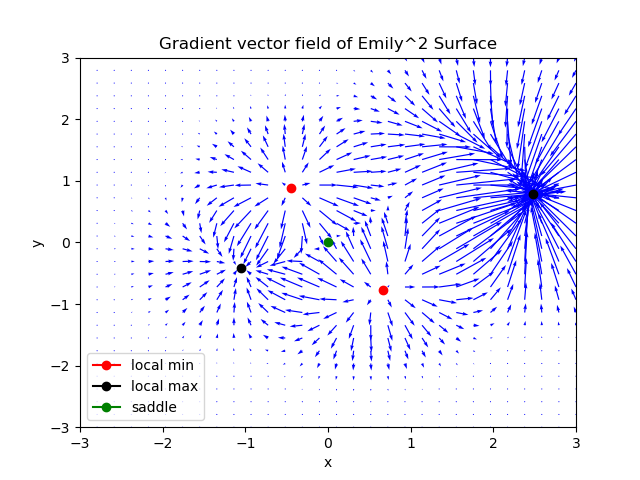

In [8]:
# number of points in the 3rd parameter control the density of the vectors in the vector field

#  np.linspace(start-point, end-point, number-of-points)
quiverRangex = np.linspace(-3, 3, 30)
quiverRangey = np.linspace(-3, 3, 30)
Xq, Yq = np.meshgrid(quiverRangex,quiverRangey)

fig, ax = plt.subplots()

# scale parameter controls the length of the vectors, increasing the scale will make the vectors SHORTER
plt.quiver(Xq, Yq, df_dx(Xq,Yq), df_dy(Xq,Yq), color='b', scale=15)
plt.plot(0.66611993, -0.78024662, marker='o', color='r', label="local min")
plt.plot(-0.45330632,  0.87671602, marker='o', color='r')
plt.plot(-1.05783737, -0.40857482, marker='o', color='k')
plt.plot(2.47926012, 0.77939788, marker='o', color='k', label="local max")
# plt.plot(xSteps, ySteps, color='pink', label="Path of gradient")
plt.plot(0,0, marker='o', color='g', label='saddle')
# Setting x, y boundary limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.title('Gradient vector field of Emily^2 Surface')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left')
plt.show()

## zooming in the vector field on smaller regions of interest

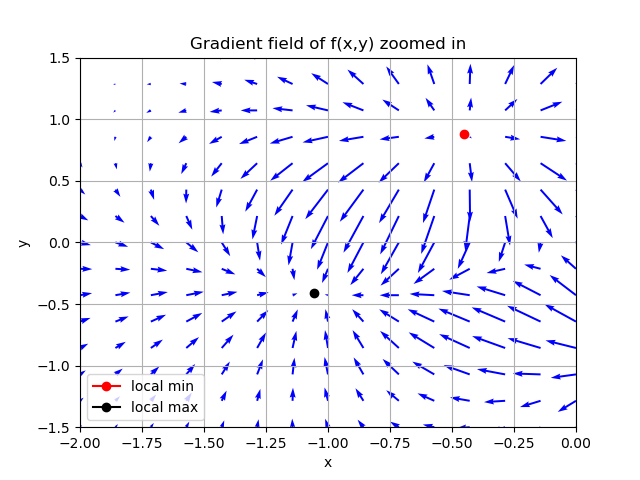

In [9]:
#   np.linspace(start-point, end-point, number-of-points)
plt.close('all')
quiverRangex2 = np.linspace(-2, 0, 15) 

quiverRangey2 = np.linspace(-1.5, 1.5, 15)
Xq2, Yq2 = np.meshgrid(quiverRangex2,quiverRangey2)

# Depict illustration
plt.figure()
ax = fig.add_subplot(111)
#plt.streamplot(Xq2, Yq2, df_dx(Xq2,Yq2), df_dy(Xq2,Yq2), density=1, linewidth=None, color='#A23BEC') # looks cool but harder to interpret
plt.quiver(Xq2, Yq2, df_dx(Xq2,Yq2), df_dy(Xq2,Yq2), color='b', scale=10)
plt.plot(-0.45330632,  0.87671602, marker='o', color='r', label='local min')
plt.plot(-1.05783737, -0.40857482, marker='o', color='k', label='local max')
# Setting x, y boundary limits
plt.xlim(-2, 0)
plt.ylim(-1.5, 1.5)

# Show plot with grid
plt.grid()

plt.title('Gradient field of f(x,y) zoomed in')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower left')
ax.set_aspect('equal')
plt.show()

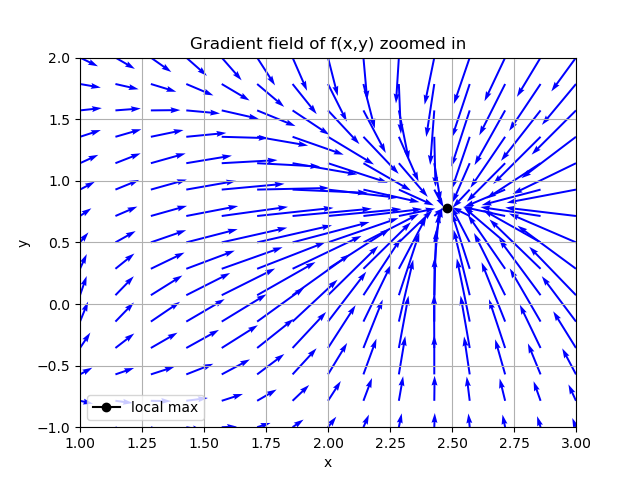

In [10]:
#   np.linspace(start-point, end-point, number-of-points)
plt.close('all')
quiverRangex3 = np.linspace(1, 3, 15)
quiverRangey3 = np.linspace(-1, 2, 15)
Xq3, Yq3 = np.meshgrid(quiverRangex3,quiverRangey3)

# Depict illustration
plt.figure()
ax = fig.add_subplot(111)
plt.quiver(Xq3, Yq3, df_dx(Xq3,Yq3), df_dy(Xq3,Yq3), scale=15, color='b')
plt.plot(2.47926012, 0.77939788, marker='o', color='k', label="local max")
# Setting x, y boundary limits
plt.xlim(1, 3)
plt.ylim(-1, 2)

# Show plot with grid
plt.grid()

plt.title('Gradient field of f(x,y) zoomed in')
plt.xlabel('x')
plt.ylabel('y')
ax.set_aspect('equal')
plt.legend(loc='lower left')
plt.show()

# Part 3 Option B
## Directional Derivative
Finds the directional derivative of the steepest ascent - gradient

Finds the directional derivative in the direction of (1,1)

Requires an original point - entered below

In [11]:
initialPoint = (0,1)

The gradient at [0, 1] is (0.6023703250900698, 0.03626496499969367)
The directional derivative from [0, 1] in the direction of steepest ascent is: 0.6034609815352981
The directional derivative from [0, 1] in the direction of (1, 1) is 0.45158334432750963


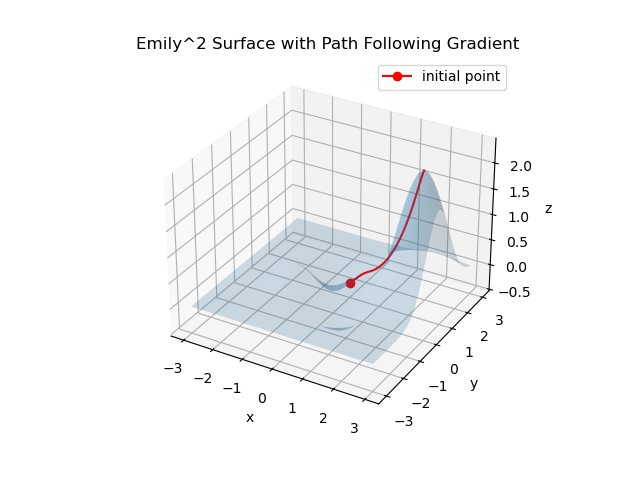

In [12]:
# calculate the gradient at the initial point
ogpoint = [initialPoint[0],initialPoint[1]]

# note: gradient function defined earlier in Part 2
gradPt = gradient(ogpoint)
# unpack and remove np.float64 notation
grad = (float(gradPt[0]), float(gradPt[1]))
# the directional derivative at the point in the direction of steepest ascent is
# calculated as the magnitude of the gradient at that point
magGrad = (grad[0]**2 + grad[1]**2)**(0.5)

print(f"The gradient at {ogpoint} is {grad}")
print(f"The directional derivative from {ogpoint} in the direction of steepest ascent is: {magGrad}")

# Calculating the directional derivative in the direction of <1, 1>
vec = (1,1)
# convert the vector into a unit vector
vecMag = (vec[0]**2 + vec[1]**2)**(0.5)
unitVec = (vec[0]/vecMag, vec[1]/vecMag)

# directional derivative in the direction of u is the dot product of unit vector-u and the gradient at the point
direcDerivU = (unitVec[0]*grad[0] + unitVec[1]*grad[1])
print(f"The directional derivative from {ogpoint} in the direction of {vec} is {direcDerivU}")

# plotting for a path following the steepest ascent
xSteps = []
ySteps = []
zSteps = []

# while loop continues until the gradient levels off to almost zero (a local maximum)
# continues appending points to the lists for plotting until that happens
while(np.abs(grad[0]) > 0.05):
    xSteps.append(ogpoint[0])
    ySteps.append(ogpoint[1])
    zSteps.append(F(ogpoint))
    nextPoint = (ogpoint[0]+(grad[0]/magGrad)/10, ogpoint[1]+(grad[1]/magGrad)/10)

    gradPt = gradient(nextPoint)
    grad = (float(gradPt[0]), float(gradPt[1]))
    magGrad = (grad[0]**2 + grad[1]**2)**(0.5)
    ogpoint = nextPoint #shift down

plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, alpha=0.2) # alpha controls transparency 1:opaque 0:clear
ax.plot(xSteps, ySteps, zSteps, alpha=1, color="r")
ax.plot(initialPoint[0], initialPoint[1], F(initialPoint), marker='o', color='r', label="initial point")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Emily^2 Surface with Path Following Gradient")
plt.legend()
plt.show()


# Part 3 Option C
## Flux
Specify the vector field and the rectangle for region of integration

In [13]:
vecField = Matrix([-y,x,0])
region = [[-2,2],[-2,2]]

Flux calculations with sympy and scipy: (integration documentation)
https://docs.scipy.org/doc/scipy/tutorial/integrate.html

cross check against https://www.desmos.com/3d/x9zbvttbi4

In [ ]:
# Create vectors as SymPy Matrices

# parametrize the surface as r(x, y) = ⟨x, y, f (x, y)⟩
surf = Matrix([x,y, (a1*x*y - a2*x**3 - a3*y**2)*sp.exp(((-x**2)-(y**2))) + (a4*x**2 - a5*x*y + a6*y**2)*sp.exp((-(x-2)**2 -((y-1)**2)))])
# take the partial derivatives of the surface
v1 = Matrix([diff(surf[0], x), diff(surf[1], x), diff(surf[2], x)]) # partial w.r.t x
v2 = Matrix([diff(surf[0], y), diff(surf[1], y), diff(surf[2], y)]) # partial w.r.t y

# Compute the cross product to find the normal vector using the .cross() method from sympy matrix
# n = rx ×ry = ⟨−fx,−fy , 1⟩
surf_normal = v1.cross(v2)

# mini test to ensure the normal vector is in the correct direction (positive z component)
if (surf_normal[2] != 1):
    print("ERROR")

# flux integrand calculations
# taking the dot product of the surface normal with the vector field

integrand_sym = surf_normal.dot(vecField) # symbolic representation 
integrand = sp.lambdify((x,y), integrand_sym, ['numpy', 'scipy']) # numeric values

# compute the integral over the given region

# The return value for integrate.nquad is a tuple, 
# with the first element holding the estimated value of the integral
# and the second element holding an estimate of the absolute integration error.
flux = integrate.nquad(integrand, region)

print(f"With the vector field {vecField[0],vecField[1], vecField[2]}")
print(f"The flux over the region {region} is {flux[0]}")
print(f"The error is {flux[1]}")


With the vector field (-y, x, 0)
The flux over the region [[-2, 2], [-2, 2]] is 1.6151034917668943
The error is 3.2058566634085784e-08


Plotting the gradient of the surface

The vector field for flux integrations

And the gradient dotted with the vector field at each point (the integrand) as the z value of a separate vector

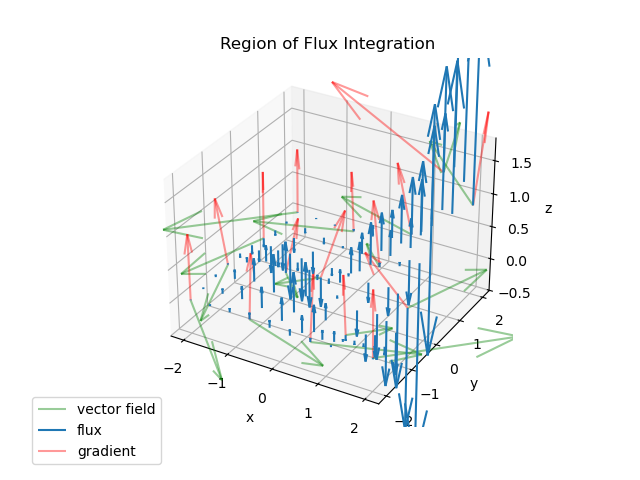

In [ ]:
# vector fields

# sample the surface at a discrete number of points
# creates a grid of points, increase numVec to increase sampling density
numVec = 10
rangeX = [region[0][0],region[0][1]]
rangeY = [region[1][0],region[1][1]]

xs = np.linspace(rangeX[0],rangeX[1],numVec)
ys = np.linspace(rangeY[0], rangeY[1],numVec)

# get numerical values for points on the surface
f = (a1*x*y - a2*x**3 - a3*y**2)*sp.exp(((-x**2)-(y**2))) + (a4*x**2 - a5*x*y + a6*y**2)*sp.exp((-(x-2)**2 -((y-1)**2)))
f_numpy = sp.lambdify((x, y), f, "numpy")

# create the x,y mesh then find the corresponding z values on the surface for the sampled points
xvals, yvals = np.meshgrid(xs, ys)
zvals = f_numpy(xvals, yvals)

# find numeric values for the vector field specified in the previous code cell symbolically
vecX = sp.lambdify((x,y), vecField[0],"numpy")
vecY = sp.lambdify((x,y), vecField[1],"numpy")
vecZ = sp.lambdify((x,y), vecField[2],"numpy")

# gradient field
fx = diff(f, x)
fy = diff(f, y)
# normal vector: n = rx ×ry = ⟨−fx,−fy , 1⟩

# lambdify to get numerical versions of symbolic functions
fx_np = sp.lambdify((x,y), fx, "numpy")
fy_np = sp.lambdify((x,y), fy, "numpy")

# calculate components for the gradient field/normal vector of the surface
# uncomment the latter half of the lines if you wish these to be unit vectors
compx = -1*fx_np(xvals, yvals) #/ ((fx_np(xvals, yvals)**2 + fy_np(xvals, yvals)**2 + 1)**(1/2))
compy = -1*fy_np(xvals, yvals) #/ ((fx_np(xvals,yvals)**2 + fy_np(xvals,yvals)**2 + 1)**(1/2))
compz = 1*np.ones_like(fx_np(xvals, yvals))#/ ((fx_np(xvals,yvals)**2 + fy_np(xvals,yvals)**2 + 1)**(1/2))

# plot the figure
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X,Y,Z, alpha=0.2) # alpha controls transparency 1:opaque 0:clear
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Region of Flux Integration")

# plot the vector field by plugging the discrete grid of points into the numeric functions of the vector field
# in plotting can use length keyword argument to make vectors shorter. e.g., length=0.5
if 1:
    ax.quiver(
        xvals[::3,::3], yvals[::3,::3], zvals[::3,::3], # location for vectors, z val not zero, but instead the function surface
        vecX(xvals[::3,::3],yvals[::3,::3]), vecY(xvals[::3,::3],yvals[::3,::3]), vecZ(xvals[::3,::3],yvals[::3,::3]),
        #xvals/(xvals**2 + yvals**2+zvals**2)**(1/2), yvals/(xvals**2 + yvals**2+zvals**2)**(1/2), zvals/(xvals**2 + yvals**2+zvals**2)**(1/2), # vector component values
        color='g',
        label="vector field",
        alpha=0.4,
    );

#integrand
ax.quiver(
    xvals, yvals, zvals, # location for vectors
    0, 0, (compx*vecX(xvals,yvals) + compy*vecY(xvals,yvals) + compz*(vecZ(xvals,yvals))),
    #xvals/(xvals**2 + yvals**2+zvals**2)**(1/2), yvals/(xvals**2 + yvals**2+zvals**2)**(1/2), zvals/(xvals**2 + yvals**2+zvals**2)**(1/2), # vector component values
    cmap="viridis",
    label="flux",
);

# gradient
# ::3,::3 means take every third element from rows and columns so only plot a third of values (too dense is difficult to see)
# if you change those to 1, it'll show every element, 
# but it needs to be changed in all parts of the plotting, otherwise the arrays are of different shapes
if 1:
    ax.quiver(
        xvals[::3,::3], yvals[::3,::3], zvals[::3,::3],
        compx[::3,::3], compy[::3,::3], compz[::3,::3],
        color='r',
        label="gradient",
        alpha=0.4,
    );

plt.legend(bbox_to_anchor=(-0.3,-0.1), loc='lower left', borderaxespad=0.);
plt.show()
